In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [2]:
file='Data/InterpolacionNewton.csv'
url='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file

100% [....................................................................................] 45 / 45

In [4]:
Data = pd.read_csv(Path_,sep=',')

In [6]:
#Data
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [11]:
Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y

for i in range(1,len(X)):
    for j in range(i,len(Y)):
        Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]

Diff

array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 19., -20.,   0.,   0.,   0.,   0.,   0.],
       [-21., -40., -20.,   0.,   0.,   0.,   0.],
       [-57., -36.,   4.,  24.,   0.,   0.,   0.],
       [-65.,  -8.,  28.,  24.,   0.,   0.,   0.],
       [-21.,  44.,  52.,  24.,   0.,   0.,   0.],
       [ 99., 120.,  76.,  24.,   0.,   0.,   0.]])

In [29]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

    h = X[1] - X[0]
            
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        for j in range(i, len(X)):
            
            Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
            
        Sum_ += poly*(Diff[i,i])/(np.math.factorial(i)*h**(i))
    
    return Sum_,np.round(Diff,2)

In [30]:
x = np.linspace(np.min(X),np.max(X),100)
y,_ = NewtonGregory(X,Y,x)

In [27]:
#M

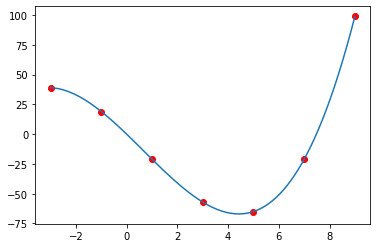

In [28]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)

In [31]:
x = sym.Symbol('x',Real='True')
y,_ = NewtonGregory(X,Y,x)

In [32]:
y

-10.0*x + 0.5*(x - 1.0)*(x + 1.0)*(1.0*x + 3.0) - 2.5*(x + 1.0)*(1.0*x + 3.0) + 9.0

In [33]:
y = y.simplify()

In [34]:
y

x*(0.5*x**2 - 1.0*x - 20.5)